#Calories Burnt Prediction using Machine Learning with Python

#Model Training Program:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("calories.csv")
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


#Univariate Analysis

<Axes: xlabel='count', ylabel='Gender'>

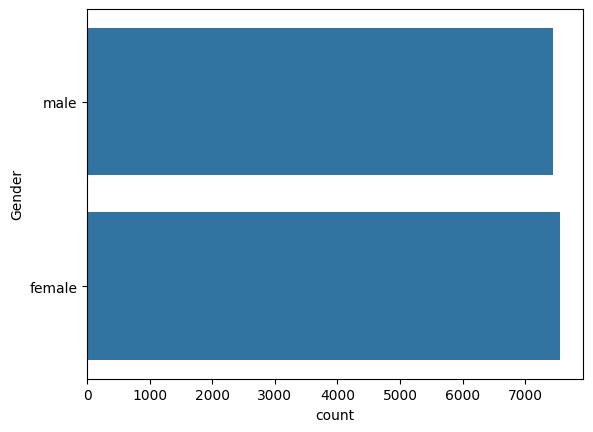

In [ ]:
sns.countplot(df['Gender'])

In [ ]:
df['Gender'].value_counts()

,count
Gender,
female,7553
male,7447


(array([1498., 1272., 1238., 1043.,  975.,  889.,  847.,  759.,  725.,
         650.,  642.,  622.,  549.,  551.,  538.,  478.,  449.,  467.,
         398.,  410.]),
 array([20.  , 22.95, 25.9 , 28.85, 31.8 , 34.75, 37.7 , 40.65, 43.6 ,
        46.55, 49.5 , 52.45, 55.4 , 58.35, 61.3 , 64.25, 67.2 , 70.15,
        73.1 , 76.05, 79.  ]),
 <BarContainer object of 20 artists>)

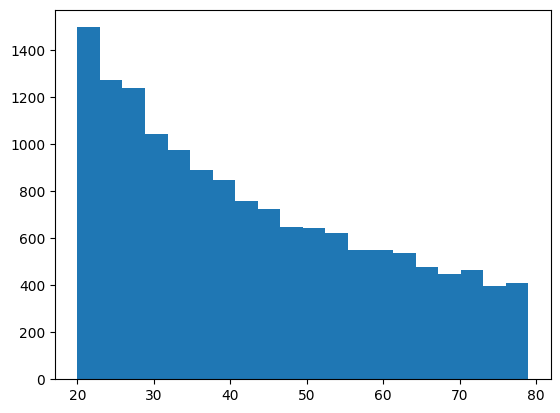

In [ ]:
plt.hist(df['Age'],bins=20)

#Bi or Multi Variate Analysis

#Scatterplot (Numerical-Numerical)

In [ ]:
df.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0


<Axes: xlabel='Duration', ylabel='Calories'>

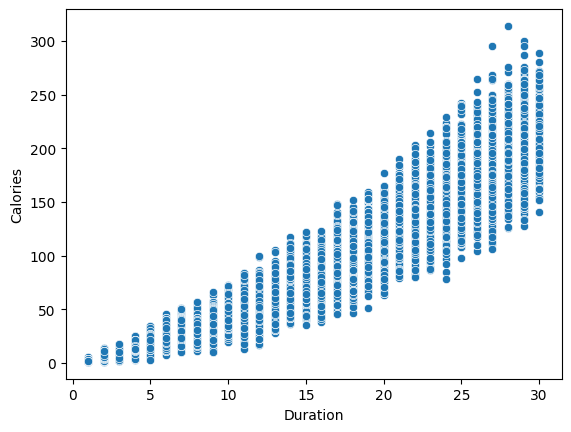

In [ ]:
sns.scatterplot(x=df['Duration'],y=df['Calories'])

#Bar Plot (Numerical-Categorical)

In [ ]:
df.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0


<Axes: xlabel='Gender', ylabel='Calories'>

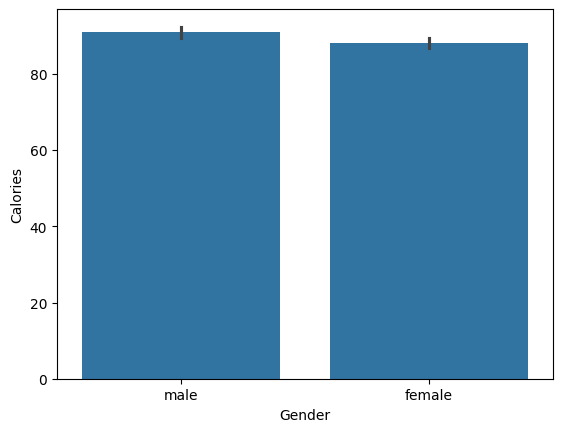

In [ ]:
sns.barplot(x=df.Gender,y=df.Calories)

#Boxplot (Numerical-Categorical)

In [ ]:
df.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0


<Axes: xlabel='Gender', ylabel='Age'>

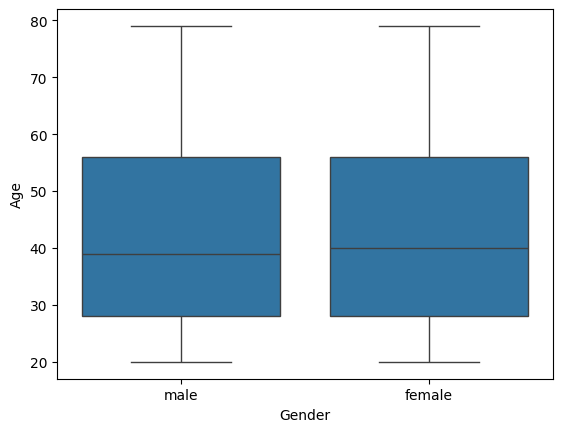

In [ ]:
sns.boxplot(x=df.Gender,y=df.Age)

In [ ]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


#Distplot (Numerical-Categorical)

In [ ]:
df.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0


<ipython-input-14-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

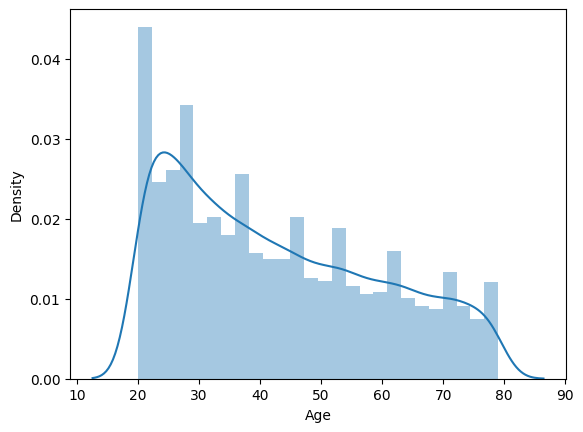

In [ ]:
sns.distplot(df['Age'])

#Lineplot (Numerical-Numerical)

In [ ]:
df.head(1)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0


<Axes: xlabel='Age', ylabel='Calories'>

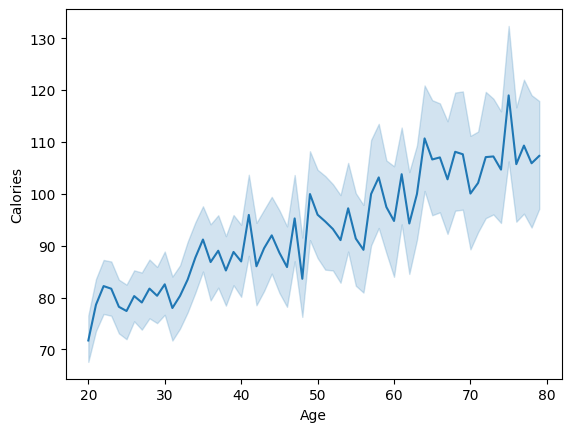

In [ ]:
sns.lineplot(x=df.Age,y=df.Calories)

#Encoding of categorical data(Gender)

In [ ]:
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0


#Splitting dataset into training and testing set

In [ ]:
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

In [ ]:
X.shape

(15000, 7)

In [ ]:
y.shape

(15000,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(12000, 7)

In [ ]:
X_test.shape

(3000, 7)

#Training the models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
models = {
    'lr': LinearRegression(),
    'rd': Ridge(),
    'ls': Lasso(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

In [ ]:
for name, mod in models.items():
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    print(f"{name}  MSE: {mean_squared_error(y_test, y_pred)}, Score: {r2_score(y_test, y_pred)}")

lr  MSE: 131.9957457508168, Score: 0.9672937151257296
rd  MSE: 131.99625903139352, Score: 0.9672935879435944
ls  MSE: 143.82689461175067, Score: 0.9643621590908397
dtr  MSE: 27.152666666666665, Score: 0.9932720342913732
rfr  MSE: 6.974330733333335, Score: 0.998271880305882


#Save models

In [ ]:
import pickle

In [ ]:
for name, mod in models.items():
    pickle.dump(mod, open(f'{name}.pkl', 'wb'))

#Save the training dataset(X_train.csv)

In [ ]:
X_train.to_csv('X_train.csv')

Explanation:
1. Data Loading & Exploration: The dataset calories.csv is loaded into a pandas DataFrame. Univariate analysis is done using histograms and count plots (e.g., gender distribution, age histogram). Bivariate and multivariate analysis is done using scatter plots, bar plots, box plots, distplots, and line plots to understand relationships between features like age, gender, duration, and calories burned.
2. Data Preprocessing: The categorical Gender column is encoded to numeric (male = 1, female = 0). Features (X) are selected by dropping User_ID and Calories. The target variable (y) is Calories.
3. Splitting the Dataset: The dataset is split into training and testing sets using an 80-20 ratio.
4. Model Training & Evaluation: Five regression models are trained: Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor and Random Forest Regressor. Each model is evaluated using: Mean Squared Error (MSE) and R² Score (accuracy).
5. Model & Data Saving: All trained models are saved as .pkl files using pickle for future use. The training dataset (X_train) is saved as a CSV file.